Name: Nhat Minh Dang

## Sound Separation Using Non-negative Matrix Factorization (NMF)

Sound separation is an important task in audio processing, which isolate individual sound sources from a mixture. This process has numerous applications, including music source separation, speech enhancement, and audio forensics. One effective technique for sound separation is Non-negative Matrix Factorization (NMF).

### What is Non-negative Matrix Factorization (NMF)?

Non-negative Matrix Factorization (NMF) is a mathematical technique used for dimensionality reduction and feature extraction. It decomposes a matrix V into two matrices W and H such that V ≈ W x H

Here, V represents the original matrix (e.g., a spectrogram of an audio signal), W contains the basis components, and H contains the coefficients that combine these components to approximate V. In the context of audio signals, W can be interpreted as the spectral components (or bases) of the audio sources, while H represents how these components are mixed to produce the observed sound.

NMF is particularly suited for sound separation tasks due to the following reasons:

1. **Non-negativity Constraint**: Audio signals and their components are inherently non-negative, making NMF a natural choice for decomposing audio spectrograms, where both the magnitude and time-frequency representations are non-negative.

2. **Sparsity**: NMF can yield sparse representations, meaning it can identify and isolate significant components of the audio signal while ignoring less relevant information. This property is useful for separating distinct sound sources.

3. **Interpretability**: The components learned by NMF are often more interpretable compared to other factorization techniques, which is advantageous when trying to understand or analyze individual sound sources.

### Applications of NMF in Sound Separation

1. **Music Source Separation**: NMF can separate individual instruments or vocal tracks from a mixed music signal, facilitating tasks like remixing or music transcription.

2. **Speech Enhancement**: By isolating speech from background noise, NMF can improve the clarity and intelligibility of spoken words in recordings.

3. **Audio Forensics**: In forensic audio analysis, NMF helps in isolating and analyzing specific audio components from evidence recordings.

### How does NMF Works for Sound Separation?

1. **Preprocessing**: Convert the audio signal into a time-frequency representation, such as a spectrogram, which captures the intensity of different frequencies over time.

2. **Matrix Decomposition**: Apply NMF to decompose the spectrogram into two non-negative matrices: one representing the spectral basis and the other representing the activation coefficients.

3. **Reconstruction**: Use the decomposed matrices to reconstruct the separated audio sources by combining the learned components in different proportions.

In summary, NMF is a powerful tool for sound separation due to its ability to provide non-negative, interpretable, and sparse representations of audio signals. Its effectiveness in isolating individual sound sources makes it a valuable technique in various audio processing applications.


## 1) Importing Libraries for Audio Seperation:

The following code imports several libraries that are essential for audio processing and machine learning task notebooks


In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.decomposition import NMF
from IPython.display import Audio, display

## 2) Loading and Playing Audio Files:

Below is my code to load two datasets and display with original sampling rate:

In [6]:
file1_path = 'audio/cat-goat-dingo.wav'
file2_path = 'audio/cat-ul-goat.wav'

y1, sr1 = librosa.load(file1_path, sr=None)  
y2, sr2 = librosa.load(file2_path, sr=None)

print("Original Audio 1:")
display(Audio(y1, rate=sr1))

print("Original Audio 2:")
display(Audio(y2, rate=sr2))

Original Audio 1:


Original Audio 2:


## 3) Loading and Playing Audio Files:

After loading the datasets, I visualize the data in waveform. The plot represents an audio signal's amplitude overtime, which indicates the loudness of the sound. The plot shows the positive and negative phases of the audio signal.
Based on the plots, while the first file contains long time parts, the second sound includes more sound parts but less time for each part.

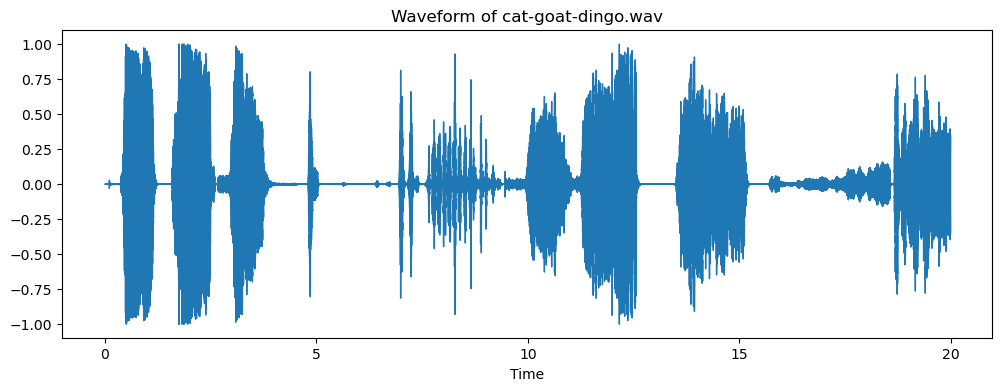

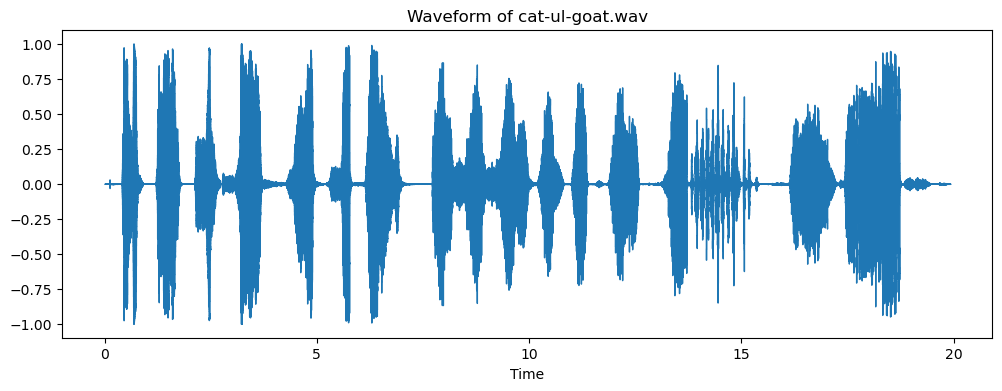

In [8]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y1, sr=sr1)
plt.title('Waveform of cat-goat-dingo.wav')
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y2, sr=sr2)
plt.title('Waveform of cat-ul-goat.wav')
plt.show()

## 4) Compute Short Time Fourier Transformation (STFT) and Extract Magnitude and Phase:

#### Short-Time Fourier Transform (STFT)

The Short-Time Fourier Transform (STFT) is a technique used to analyze non-stationary signals by transforming them into the time-frequency domain. It allows for the examination of how the frequency content of a signal changes over time.

#### Key Concepts

- **Fourier Transform**: Converts a signal from the time domain to the frequency domain.
- **Windowing**: Divides the signal into overlapping segments and applies a window function to each segment.
- **STFT Representation**: Results in a 2D matrix where one axis represents time and the other represents frequency.

#### Mathematical Representation

Given a time-domain signal $ x(t) $, the STFT is defined as:

$$
X(t, \omega) = \int_{-\infty}^{\infty} x(\tau) w(\tau - t) e^{-j \omega \tau} \, d\tau
$$

Where:
- $ X(t, \omega) $ is the STFT of the signal $ x(t) $ at time $ t $ and frequency $ \omega $.
- $ w(\tau - t) $ is the window function centered at $ t $.

### Applications

- **Speech Analysis**: Analyzing frequency changes in speech signals.
- **Music**: Understanding time-varying frequency content in musical signals.
- **Audio Effects**: Implementing effects and transformations in the frequency domain.
- **Feature Extraction**: Extracting features for machine learning and classification.

### Extracting Magnitude and Phase from the Short-Time Fourier Transform (STFT)

When working with the Short-Time Fourier Transform (STFT) of an audio signal, the output is a complex-valued matrix. This matrix contains both magnitude and phase information about the signal's frequency components over time. Here’s a detailed explanation:

#### 1. **STFT Output**

The STFT of a signal, D , is typically a complex matrix:
- **Complex Matrix  D **: Each element  D(t, f)  represents a complex number that contains both magnitude and phase information at a specific time \( t \) and frequency \( f \).

#### 2. **Extracting Magnitude**

The magnitude of the complex numbers in \( D \) gives us the amplitude of the frequency components:
- **Magnitude Extraction**: 
  $$
  \text{Magnitude} = \left| D(t, f) \right| = \sqrt{ \Re\{D(t, f)\}^2 + \Im\{D(t, f)\}^2 }
  $$
  where $ D(t, f) $ is the real part and \( \Im\{D(t, f)\} \) is the imaginary part of the complex number $ D(t, f) $.
- **Interpretation**: The magnitude represents the strength or amplitude of the frequency components at different time points.

#### 3. **Extracting Phase**

The phase of the complex numbers in \( D \) represents the phase shift of the frequency components:
- **Phase Extraction**: 
  $$
  \text{Phase} = \arg(D(t, f)) = \arctan2\left(\Im\{D(t, f)\}, \Re\{D(t, f)\}\right)
  $$
  where $ D(t, f) $ is the real part and \( \Im\{D(t, f)\} \) is the imaginary part of the complex number \( D(t, f) \).
- **Interpretation**: The phase indicates the phase shift of the frequency components, which affects the timing and alignment of the frequencies in the signal.

### Applying to Two Audio Signals

For two audio signals $ y_1 $ and $ y_2 $:

$$
D_1 = \text{STFT}(y_1)
$$
$$
D_2 = \text{STFT}(y_2)
$$

- **Magnitude Extraction**: 
  $$
  \text{Magnitude}_1 = \left| D_1 \right| \quad \text{and} \quad \text{Magnitude}_2 = \left| D_2 \right|
  $$
- **Phase Extraction**: 
  $$
  \text{Phase}_1 = \arg(D_1) \quad \text{and} \quad \text{Phase}_2 = \arg(D_2)
  $$

In this way, $ \left| D_1 \right| $ and $ \left| D_2 \right| $ give the magnitude, and $ \arg(D_1) $ and $ \arg(D_2) $ give the phase for the first and second audio signals, respectively.


In [11]:
D1 = librosa.stft(y1)
D2 = librosa.stft(y2)

magnitude1, phase1 = np.abs(D1), np.angle(D1)
magnitude2, phase2 = np.abs(D2), np.angle(D2)

## 5) Apply NMF and Visualize the process:

### After visualizing the magnitude of each dataset, I started to apply NMF to each of the dataset and visualize the matrices W1 and H1:

#### 1) Display and apply NMF for the first file:

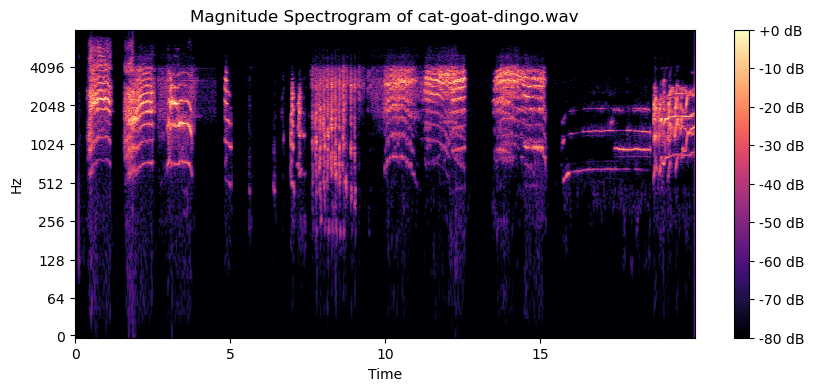

W1 shape (Basis matrix): (1025, 3)
H1 shape (Coefficients matrix): (3, 625)


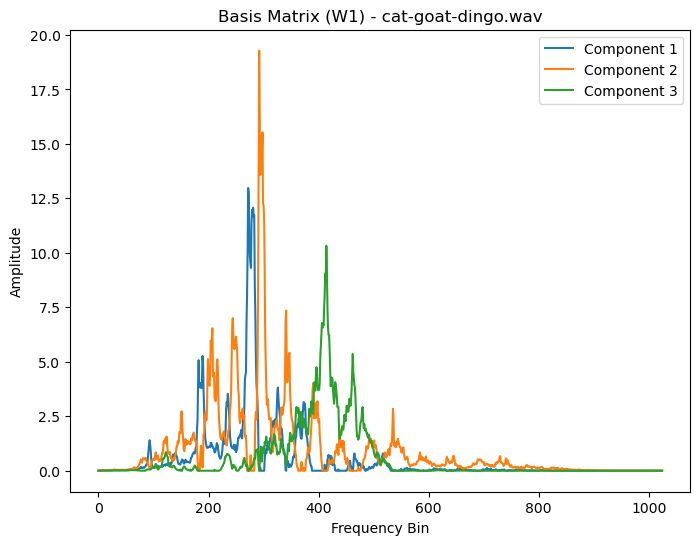

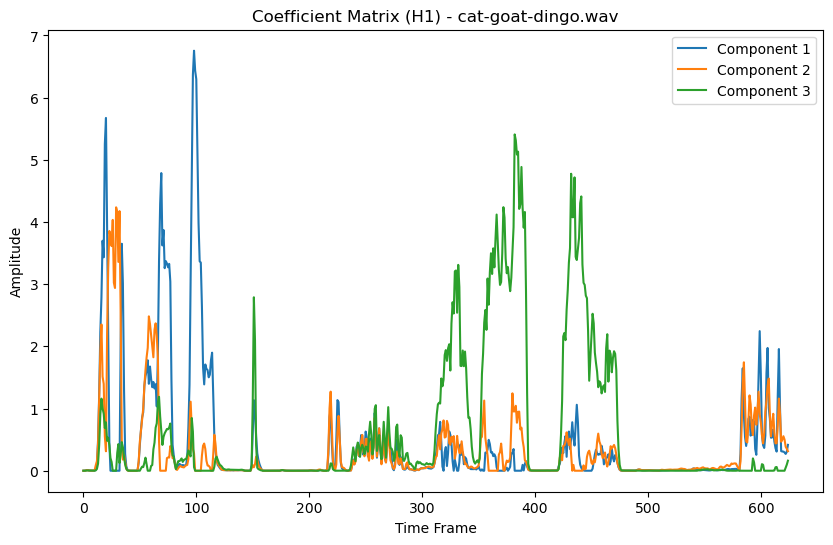

In [13]:
#Display the magnitude spectrogram of the first file.
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(magnitude1, ref=np.max),
                         sr=sr1, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of cat-goat-dingo.wav')
plt.show()

#Apply NMF.
nmf = NMF(n_components=3, init='random', random_state=0)

#Fit the model to the first audio file.
W1 = nmf.fit_transform(magnitude1)  #Basis matrix (spectral patterns).
H1 = nmf.components_                #Coefficients matrix (activation patterns).

#Print shapes of W1 and H1.
print(f"W1 shape (Basis matrix): {W1.shape}")
print(f"H1 shape (Coefficients matrix): {H1.shape}")

#Plot the basis matrix (W1).
plt.figure(figsize=(8, 6))
for i in range(W1.shape[1]):
    plt.plot(W1[:, i], label=f'Component {i+1}')
plt.title('Basis Matrix (W1) - cat-goat-dingo.wav')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#Plot the coefficient matrix (H1).
plt.figure(figsize=(10, 6))
for i in range(H1.shape[0]):
    plt.plot(H1[i, :], label=f'Component {i+1}')
plt.title('Coefficient Matrix (H1) - cat-goat-dingo.wav')
plt.xlabel('Time Frame')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#### 2) Display and apply NMF for the second file:

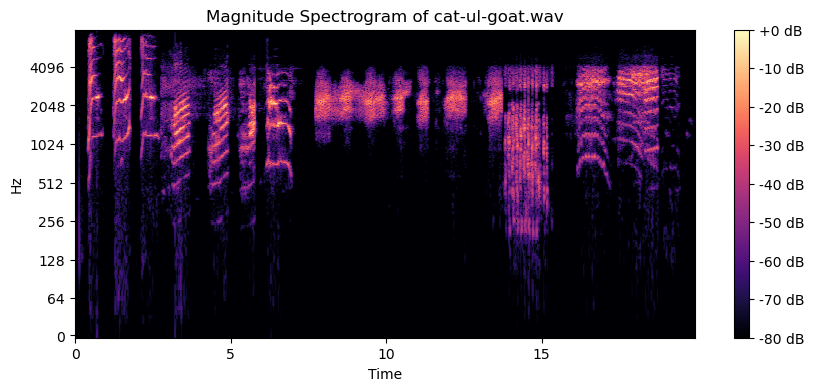

W2 shape (Basis matrix): (1025, 3)
H2 shape (Coefficients matrix): (3, 623)


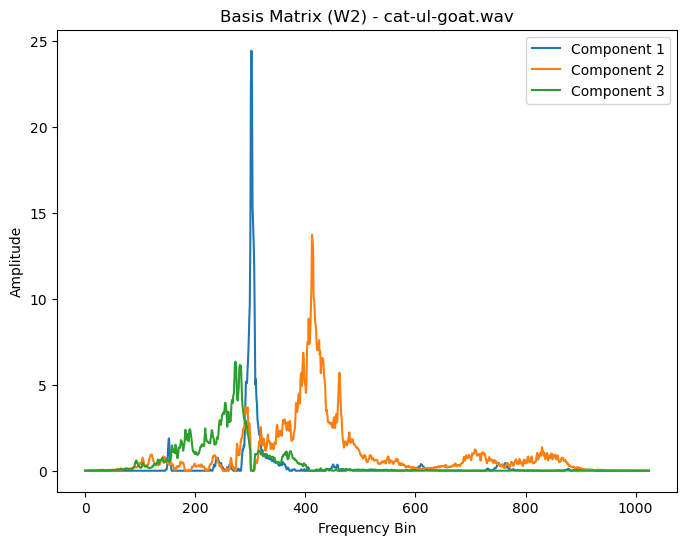

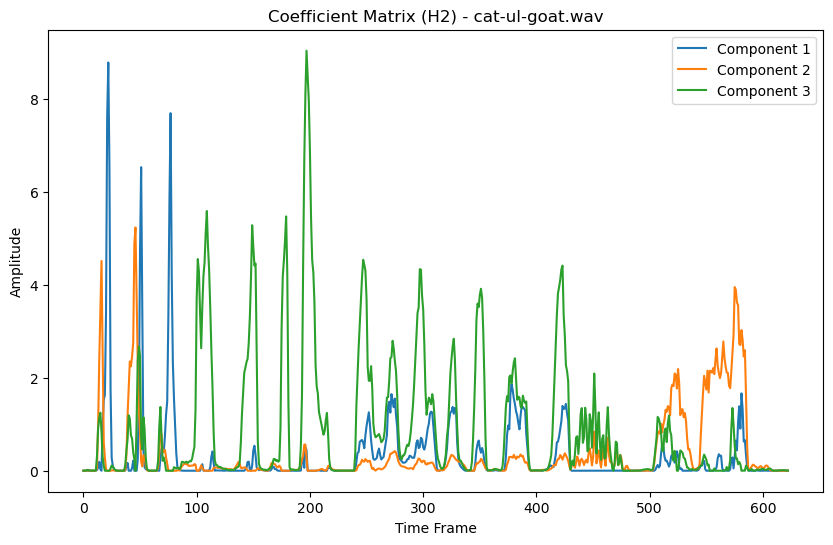

In [15]:
#Display the magnitude spectrogram of the second file.
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(magnitude2, ref=np.max),
                         sr=sr1, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of cat-ul-goat.wav')
plt.show()

#Apply NMF.
W2 = nmf.fit_transform(magnitude2)
H2 = nmf.components_

#Print shapes of W2 and H2.
print(f"W2 shape (Basis matrix): {W2.shape}")
print(f"H2 shape (Coefficients matrix): {H2.shape}")

#Plot the basis matrix (W2).
plt.figure(figsize=(8, 6))
for i in range(W2.shape[1]):
    plt.plot(W2[:, i], label=f'Component {i+1}')
plt.title('Basis Matrix (W2) - cat-ul-goat.wav')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#Plot the coefficient matrix (H2).
plt.figure(figsize=(10, 6))
for i in range(H2.shape[0]):
    plt.plot(H2[i, :], label=f'Component {i+1}')
plt.title('Coefficient Matrix (H2) - cat-ul-goat.wav')
plt.xlabel('Time Frame')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



## 6) Reconstruct file and create seperated sound:
After creating W and H matrices, I reconstruct the file into seperated files by combining the basis matrix W and H to create new magnitue spectrogram of each source.
Then, the combination is multiplied with original phase to get the full complex STFT, followed by inversing STFT back to time domain signals and display the seperated sound.

In [17]:
#Reconstruct individual sources for the first file.
reconstructed_sources1 = []
for i in range(3):
    reconstructed_mag = np.outer(W1[:, i], H1[i, :])
    reconstructed_stft = reconstructed_mag * np.exp(1j * phase1)
    y_reconstructed = librosa.istft(reconstructed_stft)
    reconstructed_sources1.append(y_reconstructed)

#Display the separated sounds for the first file.
print("Separated Sound 1 (File: cat-goat-dingo.wav):")
for i, sound in enumerate(reconstructed_sources1, 1):
    print(f"Source {i}:")
    display(Audio(sound, rate=sr1))

Separated Sound 1 (File: cat-goat-dingo.wav):
Source 1:


Source 2:


Source 3:


In [18]:
#Reconstruct individual sources for the second file.
reconstructed_sources2 = []
for i in range(3):
    reconstructed_mag = np.outer(W2[:, i], H2[i, :])
    reconstructed_stft = reconstructed_mag * np.exp(1j * phase2)
    y_reconstructed = librosa.istft(reconstructed_stft)
    reconstructed_sources2.append(y_reconstructed)

#Display the separated sounds for the second file.
print("Separated Sound 2 (File: cat-ul-goat.wav):")
for i, sound in enumerate(reconstructed_sources2, 1):
    print(f"Source {i}:")
    display(Audio(sound, rate=sr2))

Separated Sound 2 (File: cat-ul-goat.wav):
Source 1:


Source 2:


Source 3:
